In [1]:
from fastai.vision.all import *
from fastcore.basics import Int
from fastcore.transform import DisplayedTransform
from fastcore.xtras import Path

from fastai.callback.progress import ProgressCallback
from fastai.callback.schedule import fine_tune

from fastai.data.block import DataBlock, RegressionBlock
from fastai.data.transforms import RandomSplitter, get_image_files, ColReader

from fastai.losses import MSELossFlat

from fastai.torch_core import ShowTitle, show_title, TitledFloat

from fastai.vision.augment import Resize, aug_transforms, Flip, Rotate, Zoom, Warp
from fastai.vision.data import ImageBlock
from fastai.vision.learner import cnn_learner

from torchvision.models.resnet import resnet50

from datetime import datetime, timedelta
import pandas as pd
from scipy.io import loadmat

import numpy as np

In [2]:
df = pd.read_csv('df_train.csv')
df['path'] = 'data/' + df['path']
#replace .tif with .jpeg
# df['path'] = df['path'].str.replace('.tif', '.jpeg')
df.head()

,CD79B,MAP2K3,IMPDH1,SLC16A3,MPZL3,APOBR,path
0,85.881503,72.668964,86.982548,71.567919,102.397177,56.153291,data/CoreID101.tif
1,84.038087,65.603926,85.122450,101.387886,100.845705,50.422852,data/CoreID102.tif
2,82.927907,70.431921,100.535887,130.071854,89.175900,52.823941,data/CoreID105.tif
3,93.960336,72.446053,92.204068,66.299116,74.202321,39.076962,data/CoreID107.tif
4,113.968536,73.458393,94.793735,49.152307,54.013524,28.627168,data/CoreID108.tif


In [3]:
#only path and CD79B columns
df = df[['path', 'CD79B']]
#normalise
# df['CD79B'] = (df['CD79B'] - np.min(df['CD79B'])) / (np.max(df['CD79B']) - np.min(df['CD79B']))
df.head()

,path,CD79B
0,data/CoreID101.tif,85.881503
1,data/CoreID102.tif,84.038087
2,data/CoreID105.tif,82.927907
3,data/CoreID107.tif,93.960336
4,data/CoreID108.tif,113.968536


In [4]:
get_x = ColReader('path')
get_y = ColReader('CD79B')

In [5]:
block = DataBlock(blocks=(ImageBlock, RegressionBlock()),
                  get_x = get_x,
                  get_y = get_y,
                  splitter=RandomSplitter(),
                  item_tfms=Resize(460, method='squish'),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0)])

In [6]:
dls = block.dataloaders(df)

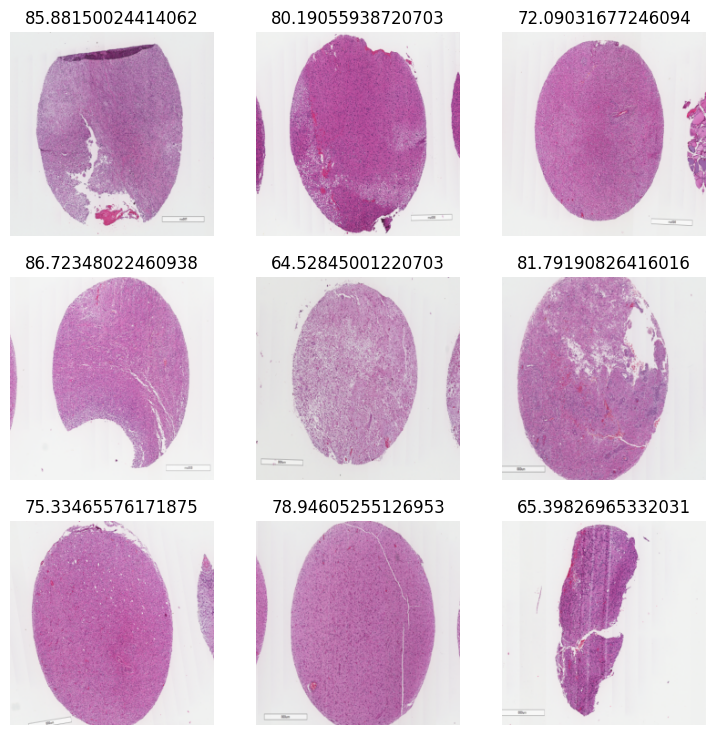

In [7]:
dls.show_batch()

In [8]:
dls.c

1

In [9]:
from fastai.metrics import mae

In [12]:
# learn = cnn_learner(dls, resnet50, loss_func=MSELossFlat(), y_range=(np.min(df['CD79B']), np.max(df['CD79B'])), metrics=mae)
learn = cnn_learner(dls, loss_func=MSELossFlat(), metrics=mae)

C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


TypeError: vision_learner() missing 1 required positional argument: 'arch'

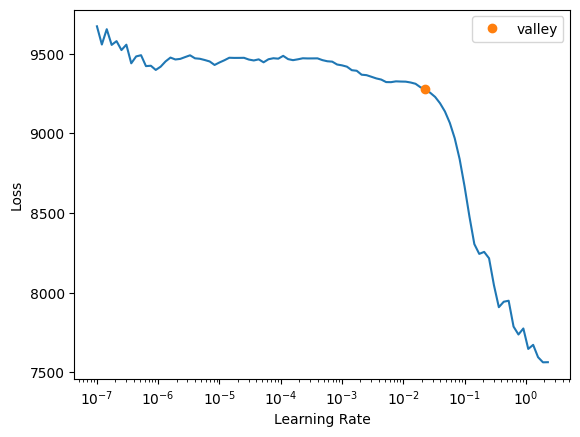

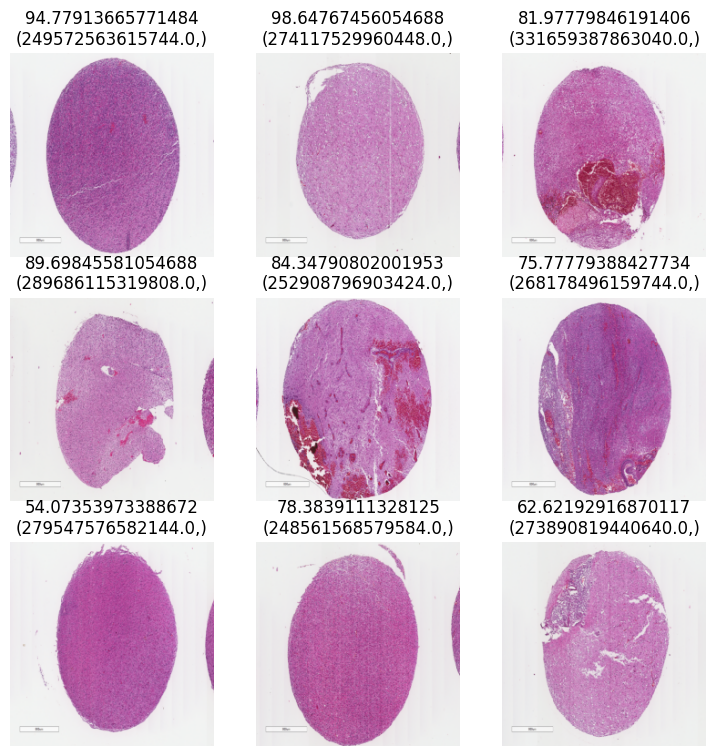

In [13]:
learn.lr_find()
learn.fine_tune(10, 10)
learn.show_results()